In [98]:
import os
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from scipy.stats import median_abs_deviation as MAD

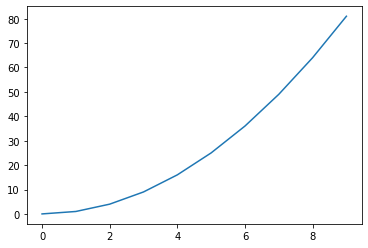

In [62]:
x = np.arange(10)
plt.plot(x,x**2)

In [44]:
hagals[24]

galid,filter_cor,CSAUTO,CONSCALE,CS2,CSByHand,CSnotes,No Ha,remove,bright star,bright galaxy,mask prob,interest ha,sky sub r,sky sub ha,poster worthy,comment
str60,float64,float64,str4,float64,int64,str157,float64,float64,int64,float64,int64,int64,int64,int64,float64,str108
VFID0602-NGC5981-INT-20190530-p040,3.459,--,--,nan,1,oversubtraction; don't use b/c large filter correction,--,1.0,0,0.0,0,0,0,0,0.0,filter correction too high


In [93]:
%run ~/github/havirgo/python/parse_cs_factor.py

i   CS   OSUB  FILT  CS2
---------------------------


In [94]:
np.sum(vhalpha['HAflag']), np.sum(vhalpha['HAobsflag'])

(532, 687)

In [95]:
wth_flag = newcs2 < .7
print("number w/newcs2 < 0.7 = ",np.sum(wth_flag))

remove_flag = hagals['remove'] == 1
print("number to remove = ",np.sum(remove_flag))


print("number to new2 < 0.7 and not remove = ",np.sum(wth_flag & ~remove_flag))

hagals[wth_flag & ~remove_flag]

number w/newcs2 < 0.7 =  17
number to remove =  65
number to new2 < 0.7 and not remove =  7


galid,filter_cor,CSAUTO,CONSCALE,CS2,CSByHand,CSnotes,No Ha,remove,bright star,bright galaxy,mask prob,interest ha,sky sub r,sky sub ha,poster worthy,comment
str60,float64,float64,str4,float64,int64,str157,float64,float64,int64,float64,int64,int64,int64,int64,float64,str108
VFID0569-NGC5989-BOK-20220424-VFID0607,1.004,1.08,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,1.0,good poster child
VFID0569-NGC5989-INT-20190530-p002,1.994,1.11,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,0.0,mask of duplicate is a little different; might be better cont sub
VFID0602-NGC5981-BOK-20220424-VFID0607,1.007,1.04,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,0.0,probably not real detection; check again after doing color based continuum subtraction
VFID0610-NGC5985-BOK-20220424-VFID0607,1.007,1.08,1.05,--,1,auto is oversubtracted in center,--,0.0,0,0.0,0,0,0,0,0.0,could be some contamination from a bright star to the N
VFID1899-NGC4143-BOK-20210414-VFID1901,1.535,1.01,1.01,--,0,point source at center probably AGN,--,0.0,0,0.0,0,0,0,0,0.0,no halpha
VFID1957-WISEAJ134414.89+414037.6-BOK-20220425-VFID1979,1.012,0.95,1,--,1,very difficult to tell; images on webpage don't look like ones on disk,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID3120-LSBCD508-01-BOK-20220424-VFID3119,1.007,0.8,3,--,--,something is off - can't get subtraction to go to zero; maybe redshift is wrong?,--,0.5,0,0.0,0,0,0,0,0.0,--


{'MOS', 'BOK', 'HDI', 'INT'}
number observed with MOS = 95
	 median = 0.970 +/- 0.027
number observed with BOK = 317
	 median = 0.923 +/- 0.112
number observed with HDI = 105
	 median = 0.936 +/- 0.031
number observed with INT = 350
	 median = 0.900 +/- 0.088


Text(0.5, 0, 'Continuum Scale Factor')

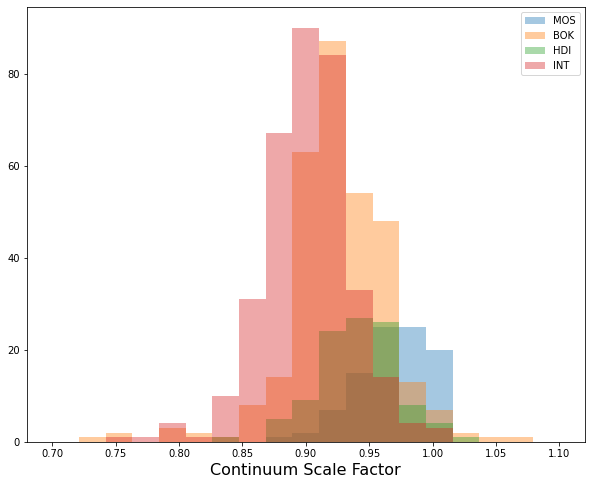

In [100]:
tels = set(alltelescope)
print(tels)
plt.figure(figsize=(10,8))
mybins = np.linspace(.7,1.1,20)
for t in tels:
    flag = alltelescope == t
    print(f"number observed with {t} = {np.sum(flag)}")
    plt.hist(newcs2[flag],label=t,alpha=.4,bins=mybins)
    # get median and MAD
    print(f"\t median = {np.nanmedian(newcs2[flag]):.3f} +/- {np.std(newcs2[flag]):.3f}")
plt.legend()
plt.xlabel("Continuum Scale Factor", fontsize=16)

In [65]:
alltelescope == 'BOK'

False

galid,filter_cor,CSAUTO,CONSCALE,CS2,CSByHand,CSnotes,No Ha,remove,bright star,bright galaxy,mask prob,interest ha,sky sub r,sky sub ha,poster worthy,comment
str60,float64,float64,str4,float64,int64,str157,float64,float64,int64,float64,int64,int64,int64,int64,float64,str108
VFID0569-NGC5989-BOK-20220424-VFID0607,1.004,1.08,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,1.0,good poster child
VFID0569-NGC5989-INT-20190530-p002,1.994,1.11,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,0.0,mask of duplicate is a little different; might be better cont sub
VFID0602-NGC5981-BOK-20220424-VFID0607,1.007,1.04,1,--,1,auto is oversubtracted,--,0.0,0,0.0,0,0,0,0,0.0,probably not real detection; check again after doing color based continuum subtraction
VFID0610-NGC5985-BOK-20220424-VFID0607,1.007,1.08,1.05,--,1,auto is oversubtracted in center,--,0.0,0,0.0,0,0,0,0,0.0,could be some contamination from a bright star to the N
VFID1899-NGC4143-BOK-20210414-VFID1901,1.535,1.01,1.01,--,0,point source at center probably AGN,--,0.0,0,0.0,0,0,0,0,0.0,no halpha
VFID1957-WISEAJ134414.89+414037.6-BOK-20220425-VFID1979,1.012,0.95,1,--,1,very difficult to tell; images on webpage don't look like ones on disk,--,0.0,0,0.0,0,0,0,0,0.0,--
VFID3120-LSBCD508-01-BOK-20220424-VFID3119,1.007,0.8,3,--,--,something is off - can't get subtraction to go to zero; maybe redshift is wrong?,--,0.5,0,0.0,0,0,0,0,0.0,--
